LUIZ DA SILVA MOURA 
11611EMT028

Imports necessarios


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import concurrent.futures
import planta

função de avaliação

In [3]:
def mult_aval(people):
    people_aval = np.array([])
    with concurrent.futures.ProcessPoolExecutor() as executor:
        for inp, response in zip(people, executor.map(planta.aval_model, people)):
            inp[3] = response
            if(len(people_aval) > 0):
                people_aval = np.append(people_aval,[inp], axis=0)
            else:
                people_aval = np.array([inp])
    return people_aval


metodo de seleção

In [4]:
def random_ranking(pesos):
    sumpos = pesos[0]/sum(pesos)
    ran = random.uniform(0,1)
    lucky = 0
    while(sumpos<ran):
        lucky = lucky+1
        sumpos  = sumpos  +  (lucky/sum(pesos))
    return(lucky)
positions = np.linspace(1,10,10)
#print(random_ranking(positions))

cruzmento


In [5]:
def crossover(father, mother):
    ran = random.randint(0, 2)
    son1 = np.zeros(4)
    son2 = np.zeros(4)
    for i in range(len(father)-1):
        son1[i] = father[i]
        son2[i] = mother[i]
    son1[ran] = mother[ran]
    son2[ran] = father[ran]
    #print('p {} m {}'.format(father, mother))
    #print('f1 {} f2 {}'.format(son1,son2))
    return [son1,son2] 

Mutation

In [6]:
def Mutation(father, rang):
    ran = random.randint(0, 2)
    son = np.zeros(4)
    for i in range(len(father)-1):
        if(i==ran):
            son[i]  = random.uniform(father[i]- (father[i]*rang), father[i]+ (father[i]*rang))
        else:
            son[i] = father[i]
    #print('mu {} filho {}'.format(father, son))
    return son

In [7]:
#adiciona somente se nao tem repetido
def Addson(sons,son, index):
    #print('in{}//->//'.format(index))
    if(len(np.where((sons[:]==son).all(1))[0]) == 0 ):
        for i in range(4):
            sons[index][i] = son[i]
        return True
    return False

TRAIN'S PARAM

In [8]:
Kp_i = 3.0
Ki_i = 0.1071
Kd_i = 21
rang = 95/100# ex 95% 
#inicia população
n_p = 100
people = np.zeros([n_p,4]) #Kp Ki Kd , fa
T_crossover = 0.8
T_muta = 0.5
n_gera = 25


Init population

In [9]:
for i in range(n_p):
    repeat = True
    new_people = np.zeros(4)
    while (repeat):
        new_people[0] = random.uniform(Kp_i- (Kp_i*rang), Kp_i+ (Kp_i*rang))
        new_people[1] = random.uniform(Ki_i- (Ki_i*rang), Ki_i+ (Ki_i*rang))
        new_people[2] = random.uniform(Kd_i- (Kd_i*rang), Kd_i+ (Kd_i*rang))
        if(len(np.where((people[:]==new_people).all(1))[0]) == 0 ):
            people[i][0] = new_people[0]
            people[i][1] = new_people[1]
            people[i][2] = new_people[2]
            repeat = False


TRAIN

In [10]:
positions = np.linspace(1,n_p-1,n_p-1)
betters = [np.array([Kp_i,Ki_i,Kd_i,planta.aval_model([Kp_i,Ki_i,Kd_i])])]

for ger in range (n_gera):
    print('geração {} =>{}'.format(ger,betters[ger][3]))
    sons = np.zeros([n_p,4]) #Kp Ki Kd , fa
    #selection
    p = mult_aval(people)# calculo do fa
    population = p[p[:,3].argsort()]
    #print('father{}'.format(population))
    #selection
    betters = np.append(betters,[population[n_p-1]], axis=0)
    ind_mom = -1
    ind_dad = -1
    cont_p = 0

    while(cont_p< n_p):
        lucky = random_ranking(positions)
        #print('l: {}'.format(lucky))
        #end selection

        #crossover 
        p_cross = random.uniform(0,1)
        p_muta = random.uniform(0,1)
        if(p_cross > T_crossover):
            if(ind_mom ==-1):
                ind_mom = lucky
            elif(ind_dad ==-1):
                ind_dad = lucky
            else:
                son1_2 = crossover(population[ind_dad][:],population[ind_mom][:])
                ind_mom = -1
                ind_dad = -1
                for son in son1_2:
                    if((cont_p< n_p)):
                        if(Addson(sons, son, cont_p)):
                            cont_p = cont_p + 1
        #end crossover
        #Mutation
        if(p_muta > T_muta) and (cont_p< n_p):
            son3  = Mutation(population[lucky][:], rang)
            if(Addson(sons, son3, cont_p)):
                cont_p = cont_p + 1
        #end Mutation
        if((p_muta <= T_muta) and (p_cross <= T_crossover) and (cont_p< n_p)):
            if(Addson(sons, population[lucky][:], cont_p)):
                cont_p = cont_p + 1
    people = sons
    


geração 0 =>2.503139964881296e-07
geração 1 =>6.717444268527869e-07
geração 2 =>9.313503539465435e-07
geração 3 =>9.313503539465435e-07
geração 4 =>1.2278583525688553e-06
geração 5 =>1.2309857896555897e-06
geração 6 =>1.5435678050220526e-06
geração 7 =>1.8187023025912842e-06
geração 8 =>1.901359735650351e-06
geração 9 =>3.024870141506912e-06
geração 10 =>2.838084393524597e-06
geração 11 =>4.04236025311325e-06
geração 12 =>4.802536136488246e-06
geração 13 =>4.802536136488246e-06
geração 14 =>5.4535203387077945e-06
geração 15 =>9.471525369347342e-06
geração 16 =>9.869204894845819e-06
geração 17 =>1.0061077268955639e-05
geração 18 =>9.869204894845819e-06
geração 19 =>1.575435269203633e-05
geração 20 =>1.575435269203633e-05
geração 21 =>4.1433335061821416e-05
geração 22 =>8.481382584054043e-05
geração 23 =>0.00012797795395355467
geração 24 =>0.00012797795395355467


In [11]:
print(betters)

[[3.00000000e+00 1.07100000e-01 2.10000000e+01 2.50313996e-07]
 [4.55153754e+00 2.26800422e-02 7.71416339e+00 6.71744427e-07]
 [9.35879077e+00 4.35737712e-02 1.07275452e+01 9.31350354e-07]
 [9.35879077e+00 4.35737712e-02 1.07275452e+01 9.31350354e-07]
 [9.42815594e+00 2.26800422e-02 7.71416339e+00 1.22785835e-06]
 [1.27339811e+01 7.94073070e-02 7.56013425e+00 1.23098579e-06]
 [1.48029736e+01 2.26800422e-02 7.56013425e+00 1.54356781e-06]
 [2.03448367e+01 2.26800422e-02 7.56013425e+00 1.81870230e-06]
 [1.60088633e+01 6.36025733e-02 6.68273463e+00 1.90135974e-06]
 [2.27807253e+01 6.36025733e-02 6.48901237e+00 3.02487014e-06]
 [2.27807253e+01 7.32167331e-02 6.48901237e+00 2.83808439e-06]
 [3.48479092e+01 4.07353047e-02 1.04184976e+01 4.04236025e-06]
 [3.48479092e+01 4.07353047e-02 8.07624136e+00 4.80253614e-06]
 [3.48479092e+01 4.07353047e-02 8.07624136e+00 4.80253614e-06]
 [3.93908937e+01 4.07353047e-02 8.07624136e+00 5.45352034e-06]
 [6.76799747e+01 4.07353047e-02 8.07624136e+00 9.471525

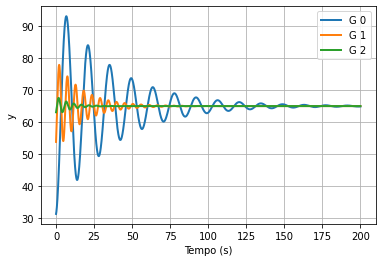

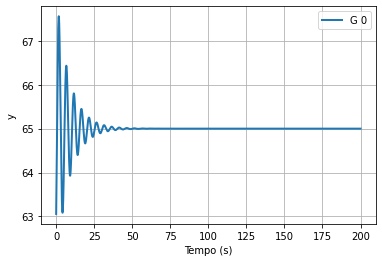

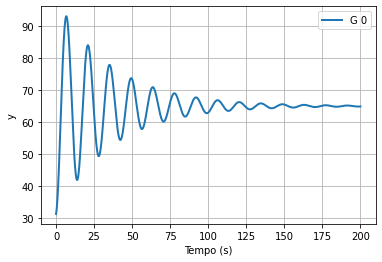

In [14]:
planta.plot([betters[0],betters[10],betters[len(betters)-1]])
planta.plot([betters[len(betters)-1]])
planta.plot([betters[0]])

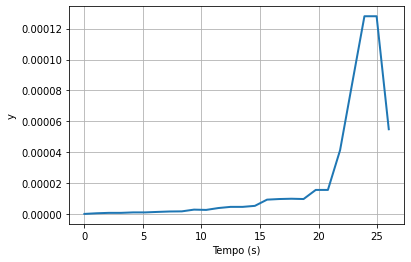

In [15]:
plt.figure()
plt.plot(np.linspace(0,len(betters),len(betters)), betters.T[3], lw=2)
plt.xlabel('Tempo (s)')
plt.ylabel('y')
plt.grid()
plt.show()

In [16]:
p = np.array([1,1,2,3])
print(p[p.argsort()])

[1 1 2 3]
